In [ ]:
# The code below will download the cached files generated in the assignment
! pip install gdown
import gdown
url = 'https://drive.google.com/drive/u/0/folders/1VAoYVzuwqOEvzpCFqKnhLgKB2axb8kTY' 
gdown.download_folder(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retrieving folder list


Processing file 1OeSq85KOgrAXqnUSEFBTSdFb3qnTKYpL bert_summary_dataset.tsv
Processing file 1bQTYjyB14nX8jKrhgBzKgVje29UsEkGK bert_test_dataset.tsv
Processing file 1VfrF73vHSSPVJgxDKwNEUjjioAK9qtFt bert_train_dataset.tsv
Processing file 10rfVJI8WQcVxRLS_ASDPC0b8Hw5NoF4v bert_val_dataset.tsv
Retrieving folder 1RGnOvP2jti9jJ36tyVyd5wrPpzH-xCXc COVID_SciBERT_04-16-16:54:54__114
Processing file 1aX6aYkpMzapx1DYyqNBzqu8OfbuITweY config.json
Processing file 1NPgtgBu6wSWhyv4HQ-rmq_9VfiRauKPq generation_config.json
Processing file 1yilhAAWYGJl2W1C3S2aWCMAq4zrgU4dj pytorch_model.bin
Processing file 1TG_PttKxhewhTpGJ9COdwtZPo82gJPjP training_args.bin
Processing file 1XgNUikpklgc05Hgs3X5Ptmufmbdz2DAz glove_final_dict.pkl
Processing file 1Ktis2eVkOvvTrIDVxnpbEKuRGBJnLDou glove.6B.100d.txt
Processing file 1VtYaiXL-Saegu1OhXcjO6uRAlFstrMS6 glove.840B.300d.txt
Processing file 12cJ4zlK6lAx6QkphXZWB8NFcoEnwdRbL knowledge_base.pkl
Processing file 11TqG8Vv09xmtnq1ZYhfh3JkprmnmMxiY method_1_ckpt_final.pkl


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1OeSq85KOgrAXqnUSEFBTSdFb3qnTKYpL
To: /content/Applied_NLP/bert_summary_dataset.tsv
100%|██████████| 51.3M/51.3M [00:00<00:00, 97.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bQTYjyB14nX8jKrhgBzKgVje29UsEkGK
To: /content/Applied_NLP/bert_test_dataset.tsv
100%|██████████| 11.2M/11.2M [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VfrF73vHSSPVJgxDKwNEUjjioAK9qtFt
To: /content/Applied_NLP/bert_train_dataset.tsv
100%|██████████| 34.8M/34.8M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=10rfVJI8WQcVxRLS_ASDPC0b8Hw5NoF4v
To: /content/Applied_NLP/bert_val_dataset.tsv
100%|██████████| 3.72M/3.72M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aX6aYkpMzapx1DYyqNBzqu8OfbuITweY
To: /content/Applied_NLP/COVID_SciBERT_04-16-16:54:54__114/config.json
100%|██████████| 4.82k/4.82k [00:00<0

['/content/Applied_NLP/bert_summary_dataset.tsv',
 '/content/Applied_NLP/bert_test_dataset.tsv',
 '/content/Applied_NLP/bert_train_dataset.tsv',
 '/content/Applied_NLP/bert_val_dataset.tsv',
 '/content/Applied_NLP/COVID_SciBERT_04-16-16:54:54__114/config.json',
 '/content/Applied_NLP/COVID_SciBERT_04-16-16:54:54__114/generation_config.json',
 '/content/Applied_NLP/COVID_SciBERT_04-16-16:54:54__114/pytorch_model.bin',
 '/content/Applied_NLP/COVID_SciBERT_04-16-16:54:54__114/training_args.bin',
 '/content/Applied_NLP/glove_final_dict.pkl',
 '/content/Applied_NLP/glove.6B.100d.txt',
 '/content/Applied_NLP/glove.840B.300d.txt',
 '/content/Applied_NLP/knowledge_base.pkl',
 '/content/Applied_NLP/method_1_ckpt_final.pkl',
 '/content/Applied_NLP/method_2_ckpt_final.pkl',
 '/content/Applied_NLP/processed_df.csv',
 '/content/Applied_NLP/sampled_df.csv',
 '/content/Applied_NLP/SciBERT_04-18-13:07:07_115/config.json',
 '/content/Applied_NLP/SciBERT_04-18-13:07:07_115/generation_config.json',
 '/co

In [ ]:
assign3_root_path = '/content/Applied_NLP' 
# installing and importing required libraries
%pip install transformers
%pip install datasets
%pip install rouge
%pip  install wandb
%pip  install scispacy


import pandas as pd
import os
import os.path
import spacy
import tqdm
import pickle
import numpy as np
import math
from numpy import dot
from numpy.linalg import norm
import nltk
import rouge
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 21.4 MB/s eta 0:00:

The original dataset on Kaggle huge, which contains 1056660 samples. To make this runable on my local pc, I randomly sampled 10,000 samples from the original dataset on Kaggle Notebook online, so I don't need to download the whole 20GB.
 Since I sampled these online, I am going to describe how I sampled the data and what attributes I chose. Here are the detailed steps of how I sampled 10,000 data in Kaggle Notebook:
1. use random.sample() to select 25,000 article json path
2. read the sampled json get the whole body text, and first 5 bibliographies
3. match the paper_id to metadata.csv to get more useful attributes of the articles, including title, authors, and journal
4. Data cleaning, including remove samples with missing attributes, non-English, and duplicates.
5. Then randomly sampled 10,000 samples from the cleaned data
5. save to a csv file called 'sampled_df.csv' and download this sampled dataset to my local PC

In [ ]:
data_path = assign3_root_path+'/sampled_df.csv'
sampled_df = pd.read_csv(data_path, index_col=0) # index_col = 0 -> avoid fist 'unnamed col'
print(f'number of na: {sampled_df.isnull().any().sum()}')
sampled_df.head()

number of na: 0


,paper_id,title,authors,journal,abstract,body_text,bib
0,PMC8419652,Curriculum tinkering in situations of crises a...,"Amin, Nyna; Mahabeer, Pryah",Prospects (Paris),This article interrogates a curriculum recover...,"In this section, we provide an overview of Sou...",['Big policies/small world: An introduction to...
1,PMC8527883,Similarities and Differences in the Acute-Phas...,"Coleman, Celeste; Doyle-Meyers, Lara A.; Russe...",Front Immunol,Understanding SARS-CoV-2 immune pathology is c...,The rapid emergence and dissemination of sever...,['Clinical Characteristics of Coronavirus Dise...
2,PMC7107128,Effect of insoluble fiber supplementation appl...,"Yokhana, J. S.; Parkinson, G.; Frankel, T. L.",Poult Sci,Two experiments were conducted to study effect...,Growth and development in layer pullets during...,"['The estimation of pepsin, trypsin, papain, a..."
3,PMC7972757,Narrating Arabic Translation Online: Another P...,"Alonayq, Abdulmohsen",When Translation Goes Digital,This chapter takes a socionarrative approach t...,The translation sector has seen an increase in...,"['Arabic tradition', 'The narrative constructi..."
4,PMC8834262,Roles of Podoplanin in Malignant Progression o...,"Suzuki, Hiroyuki; Kaneko, Mika K.; Kato, Yukinari",Cells,Podoplanin (PDPN) is a cell-surface mucin-like...,Podoplanin (PDPN)/T1α/E11 antigen/PA2.26 antig...,['Podoplanin: An emerging cancer biomarker and...


### Pre-processing

In [ ]:
from ast import literal_eval

# only need to download these 3 once
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def pre_processing(df):
    path = assign3_root_path+'/processed_df.csv'
    if not os.path.isfile(path):
        df_c = df.copy()
        #no punctuation or non-alphanumeric chars except periods
        df_c['body_text'] = df_c.body_text.str.replace('[^A-Za-z0-9\s+\-+\.]',' ') #replace special character with a space
        df_c['abstract'] = df_c.abstract.str.replace('[^A-Za-z0-9\s+\-+\.]',' ') #replace special character with a space

        # remove in-text reference e.g., [3-4]
        df_c['body_text'] = df_c.body_text.str.replace('\[.*?\]',' ')

        # remove new lines and back slash
        df_c['body_text'] = df_c.body_text.str.replace('\n',' ')
        df_c['body_text'] = df_c.body_text.str.replace('\s+',' ')

        df_c['abstract'] = df_c.abstract.str.replace('\n',' ')
        df_c['abstract'] = df_c.abstract.str.replace('\s+',' ')

        # no stopwords
        stops = stopwords.words('english') # english stopwords, because our data is in english
        df_c['body_text'] = df_c.body_text.apply(lambda x: " ".join([word for word in x.split() if word not in stops]))
        df_c['abstract'] = df_c.abstract.apply(lambda x: " ".join([word for word in x.split() if word not in stops]))

        df_c['authors'] = df_c.authors.apply(lambda x: x.split(';'))
        df_c['authors'] = df_c.authors.apply(lambda x: [name.strip() for name in x if name.strip() != ''])

        df_c['paper_identifier'] = df_c['paper_id']
        df_c['paper_id'] = [i for i in range(df_c.shape[0])]

        # keep the original body text and abstract for showing IR result
        df_c['original_body_text'] = df['body_text'].copy()
        df_c['original_abstract'] = df['abstract'].copy()


        # save to csv file (pre-process is time-consuming, avoid processing everytime)
        df_c.to_csv(path)
    else:
        df_c = pd.read_csv(path,index_col=0,converters={"bib": literal_eval,"authors": literal_eval}) # body-text col is list of sentences

    return df_c


processed_df = pre_processing(sampled_df)
processed_df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,paper_id,title,authors,journal,abstract,body_text,bib,paper_identifier,original_body_text,original_abstract
0,0,Curriculum tinkering in situations of crises a...,"[Amin, Nyna, Mahabeer, Pryah]",Prospects (Paris),This article interrogates curriculum recovery ...,In section provide overview South Africa demog...,[Big policies/small world: An introduction to ...,PMC8419652,"In this section, we provide an overview of Sou...",This article interrogates a curriculum recover...
1,1,Similarities and Differences in the Acute-Phas...,"[Coleman, Celeste, Doyle-Meyers, Lara A., Russ...",Front Immunol,Understanding SARS-CoV-2 immune pathology crit...,The rapid emergence dissemination severe acute...,[Clinical Characteristics of Coronavirus Disea...,PMC8527883,The rapid emergence and dissemination of sever...,Understanding SARS-CoV-2 immune pathology is c...
2,2,Effect of insoluble fiber supplementation appl...,"[Yokhana, J. S., Parkinson, G., Frankel, T. L.]",Poult Sci,Two experiments conducted study effects dietar...,Growth development layer pullets rearing early...,"[The estimation of pepsin, trypsin, papain, an...",PMC7107128,Growth and development in layer pullets during...,Two experiments were conducted to study effect...
3,3,Narrating Arabic Translation Online: Another P...,"[Alonayq, Abdulmohsen]",When Translation Goes Digital,This chapter takes socionarrative approach exa...,The translation sector seen increase volunteer...,"[Arabic tradition, The narrative construction ...",PMC7972757,The translation sector has seen an increase in...,This chapter takes a socionarrative approach t...
4,4,Roles of Podoplanin in Malignant Progression o...,"[Suzuki, Hiroyuki, Kaneko, Mika K., Kato, Yuki...",Cells,Podoplanin PDPN cell-surface mucin-like glycop...,Podoplanin PDPN T1 E11 antigen PA2.26 antigen ...,[Podoplanin: An emerging cancer biomarker and ...,PMC8834262,Podoplanin (PDPN)/T1α/E11 antigen/PA2.26 antig...,Podoplanin (PDPN) is a cell-surface mucin-like...


In the pre-processing step, I processed on body text, abstract, and authors. The detailed steps are as follows:
1. Removed non-alphanumeric chars (except '-' and '.'): Because they are most likely to be greek letters that used in the equations or experiment variables, which is not informative in out task. However, '-' used a lot in medical named entities, such as 'COVID-19', 'SARS-CoV-2', 'whole-blood', therefore, I did not remove '-'. Otherwise it would have negative impact on the performance of NER and thus the following downstream tasks. Also '.' is useful for differntiate sentences when perform summarization.

2. Removed in-text references, new lines, back slashes and stopwords, because they are not informative, and removing them will not affect the NER and other following downstream tasks.

3. Processed authors from a string containing all names seperated by ';" to a list of individual's name (using .split(';'))

4. Renamed the 'paper_id' to 'paper_identifier', and use the index of the sample to be the 'paper_id'

Some Notes:

- I did not perform lowercasing here, because in biomedical cases there are a lot of abbreviations, which will be specifically resolved in the entity linker pipeline when building the KB.
- I also didn't perform lemmatization nor stemming, because they might modify the named entity, and would be difficult to be recognized by the NER model. Also, lemmatization and stemming works on token level, but there are named entities consist of multiple word tokens, and modified a token in a named entity phrase would affect the NER and the following downstream tasks.For example, 'lung kidney lymphatic vascular systems', 'lymphatic' will be stemmed to 'lymphat'.
- I did not convert the text to BOW as the assignment spec 1.c said, because I will use scispacy to perform NER, which takes text as input. And also in the 'assignment tips' and assignment specification step 4 (d), we are encouraged to use word embeddings, so I am not using BOW to vectorise the text in this assignment.

## Named Entity Recognition and Knowledge Base

In [ ]:
#  To solve: NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968
import locale
locale.getpreferredencoding = lambda: "UTF-8"
! pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

class Knowledge_Base:
    def __init__(self, processed_df):
        self.processed_df = processed_df

        # init nlp model, model will be loaded when bulding kb
        self.nlp = None

        # init kb, or load kb if it's already built
        self.kb = None
        self.kb_path = assign3_root_path+'/knowledge_base.pkl'
        if os.path.isfile(self.kb_path):
            with open(self.kb_path, 'rb') as kb_pickled:
                self.kb = pickle.load(kb_pickled)
        else:
            self.build_KB_with_entities()

    def __init_nlp(self):
        self.nlp = spacy.load("en_core_sci_sm") # for NER #en_ner_bc5cdr_md #en_core_sci_sm

        # k=1: return the top candidate (concept with the highest score)
        # default score thresh = 0.7, but change to 0.8
        # umls: Unified Medical Language System.
        self.nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls", 'k':1, 'threshold':0.8}) # for getting canonical name and aliases
        return

    def __init_KB(self):
        # This function only pre-process the paper and author part.
        kb = {'paper':{id_str:{} for id_str in self.processed_df['paper_id'].tolist()}}
        authors_dict = {}
        for id,dic in tqdm.tqdm(kb['paper'].items(), desc = 'Initialize KB', unit = ' article'):
            title = self.processed_df.loc[self.processed_df['paper_id']==id]['title'].values[0]
            dic.update({'title':title})

            authors_lst = self.processed_df.loc[self.processed_df['paper_id']==id]['authors'].values[0]
            dic.update({'authors':authors_lst})

            for author in authors_lst:
                if author not in authors_dict.keys():
                    authors_dict.update({author:{'paper_lst':{id}}})
                else:
                    authors_dict[author]['paper_lst'].add(id)

        kb.update({'authors':authors_dict})

        # init entity part for futher entity related processes
        kb.update({'entities':{}})
        return kb

    def __update_entity_dict(self,entity_dict,doc,linker,paper_id):
        for entity in doc.ents: # for each recognised entities
            for umls_ent in entity._.kb_ents: # for each matched umls concept matched
                # 'umls_ent[0]' is the concept entity with the highest score
                concept_id = (linker.kb.cui_to_entity[umls_ent[0]]).concept_id
                canonical_name = (linker.kb.cui_to_entity[umls_ent[0]]).canonical_name
                definition = (linker.kb.cui_to_entity[umls_ent[0]]).definition
                if len((linker.kb.cui_to_entity[umls_ent[0]]).aliases) == 0:
                    umls_aliases_set = set()
                else:
                    umls_aliases_set = set((linker.kb.cui_to_entity[umls_ent[0]]).aliases)

                entity_name = (entity.text).strip()

                # if this a new entity for both current KB and this paper
                if canonical_name not in self.kb['entities'].keys() and canonical_name not in entity_dict.keys():
                    if entity.text != canonical_name:
                        umls_aliases_set.add(entity_name)

                    # entity_dict.update({canonical_name:{'cid': concept_id, 'definition':definition, 'aliases':umls_aliases_set, 'paper_lst':{paper_id}}})
                    entity_dict.update({canonical_name:{'cid': concept_id, 'definition':definition, 'aliases':umls_aliases_set, 'paper_lst':{paper_id},'tf_lst':[[paper_id,1]]}})#*

                # if it both in kb and the paper, just +1 in term freq
                elif canonical_name in self.kb['entities'].keys() and canonical_name in entity_dict.keys():
                    for i,tf_lst in enumerate(entity_dict[canonical_name]['tf_lst']):
                        if tf_lst[0] == paper_id:
                            entity_dict[canonical_name]['tf_lst'][i][1] = entity_dict[canonical_name]['tf_lst'][i][1]+1
                            break

                # if this entity not in the KB but in this paper
                elif canonical_name not in self.kb['entities'].keys() and canonical_name in entity_dict.keys():
                    entity_dict[canonical_name]['paper_lst'].add(paper_id)
                    for i,tf_lst in enumerate(entity_dict[canonical_name]['tf_lst']):
                        if tf_lst[0] == paper_id:
                            entity_dict[canonical_name]['tf_lst'][i][1] = entity_dict[canonical_name]['tf_lst'][i][1]+1
                            break
                    # entity_dict[canonical_name]['tf_lst'][paper_id] = entity_dict[canonical_name]['tf_lst'][paper_id] +1 #*
                    if entity_name != canonical_name:
                        entity_dict[canonical_name]['aliases'].add(entity_name)


                # if this entity appears in th KB, but new to this paper
                elif canonical_name in self.kb['entities'].keys() and canonical_name not in entity_dict.keys():
                    self.kb['entities'][canonical_name]['paper_lst'].add(paper_id)
                    self.kb['entities'][canonical_name]['tf_lst'].append([paper_id,1])

                    # self.kb['entities'][canonical_name]['tf_lst'][paper_id] = self.kb['entities'][canonical_name]['tf_lst'][paper_id] + 1
                    if entity_name != canonical_name:
                        self.kb['entities'][canonical_name]['aliases'].add(entity_name)
                    entity_dict.update(self.kb['entities'][canonical_name])

        return entity_dict

    def __build_all_entity_dict(self,text,title,paper_id,body_text):
        # This function is keeping updating this paper's entity dictionary
        # during process paper's title, abstract and the first 500 and last 500 words in body text
        entity_dict = {}
        linker = self.nlp.get_pipe("scispacy_linker")
        text_doc = self.nlp(text)
        entity_dict.update(self.__update_entity_dict(entity_dict,text_doc,linker,paper_id))

        title_doc = self.nlp(title)
        entity_dict.update(self.__update_entity_dict(entity_dict,title_doc,linker,paper_id))

        body_text_doc = self.nlp(body_text)
        entity_dict.update(self.__update_entity_dict(entity_dict,body_text_doc,linker,paper_id))

        return entity_dict

    def build_KB_with_entities(self):
        self.kb = self.__init_KB()
        self.__init_nlp()

        for paper_id,paper_dict in tqdm.tqdm(self.kb['paper'].items(), desc = 'Building entities', unit = ' article'):
            abstract = self.processed_df.loc[self.processed_df['paper_id']==paper_id]['abstract'].values[0]
            title = paper_dict['title']
            # only process the 1st 500 and the last 500 words in the body text,
            # these might be the introduction and the conclusion of the article, which is more representative of this paper
            body_text = self.processed_df.loc[self.processed_df['paper_id']==paper_id]['body_text'].values[0]
            body_text_intro = ' '.join(body_text.split()[:500])
            body_text_conclu = ' '.join(body_text.split()[-500:])
            sampled_body_text = body_text_intro + body_text_conclu

            entity_dict = self.__build_all_entity_dict(abstract, title,paper_id, sampled_body_text)
            for k in ['cid', 'definition', 'aliases', 'paper_lst']:
                entity_dict.pop(k, None)
            self.kb['entities'].update(entity_dict)
            paper_dict.update({'entities': list(entity_dict.keys())})
        for canonical in self.kb['entities'].keys():
            temp = []
            if isinstance(self.kb['entities'][canonical],dict):
                for tf_lst in self.kb['entities'][canonical]['tf_lst']:
                    if len(temp) == 0:
                        temp.append(tf_lst)
                    else:
                        if tf_lst[0] == temp[-1][0]:
                            temp[-1][1] = temp[-1][1]+1
                        else:
                            temp.append(tf_lst)
                self.kb['entities'][canonical].update({'tf_lst':temp})
        self.kb['entities'].pop('tf_lst')
        self.__save_kb()
        return
    # save knowledge base
    def __save_kb(self):
        with open(self.kb_path,'wb') as kb_pickled:
            pickle.dump(self.kb,kb_pickled)
            print('Knowledge base saved successfully!')
        return


k = Knowledge_Base(processed_df)
KB = k.kb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.1-py3-none-any.whl size=15870871 sha256=60238fe77f69639c5a8ac06e80adc39a8754457d23815424a094789d5959401f
  Stored in directory: /root/.cache/pip/wheels/f5/2e/39/9c9d425a1d34c06409420f7c65c5e10a56f7b149a3c37cdfa6
Successfully built en-core-sci-sm


### The structure of my knowledge base:

```
├── KB
    ├── 'paper'
        ├── 'paper_id 1'
            ├── 'title' : xxx
            ├── 'authors' : [xxx,xxx,...]
            ├── 'entities' : [xxx,xxx,...]
        ├── 'paper_id 2'
            ├── 'title' : xxx
            ├── 'authors' : [xxx,xxx,...]
            ├── 'entities' : [xxx,xxx,...]
        .
        .
        .

    ├── 'authors'
        ├── 'author name 1'
            ├── 'paper_lst' : [xxx,xxx,...]
        ├── 'author name 2'
            ├── 'paper_lst' : [xxx,xxx,...]
        .
        .
        .

    ├── 'entities'
        ├── 'canonical_name 1'
            ├── 'cid' (concept id, or CUI) : xxx
            ├── 'definition' : xxx
            ├── 'aliases' : [xxx,xxx,...]
            ├── 'paper_lst' : [xxx,xxx,...]
            ├── 'tf_lst' : [xxx,xxx,...]
        ├── 'canonical_name 2'
            ├── 'cid' (concept id, or CUI) : xxx
            ├── 'definition' : xxx
            ├── 'aliases' : [xxx,xxx,...]
            ├── 'paper_lst' : [xxx,xxx,...]
            ├── 'tf_lst' : [xxx,xxx,...]
        ├── 'canonical_name 3'
            ├── 'cid' (concept id, or CUI) : xxx
            ├── 'definition' : xxx
            ├── 'aliases' : [xxx,xxx,...]
            ├── 'paper_lst' : [xxx,xxx,...]
            ├── 'tf_lst' : [xxx,xxx,...]
        .
        .
        .
```
In this section, I only processed the paper title, abstract and first 500 words and last 500 words of the body text, because these two parts of the body text can introduce and conclude this paper, which are more representative of the body text. (I tried to process the whole body_text previously, but my computer always froze and could not process all 10000 samples' whole body text, so I sub-sampled the body text to these two parts to represent the whole body text). The process pipeline consists of NER, abbrev resolution, and a further text normalisation using UMLS's concept id (cui). The detailed processing steps are as follows: <br>

I utilized the library sciSpaCy 'en_core_sci_sm' pretrained model to perform Named Entity Recognition, and added extra pipeline ,entity_linker with abbreviation resolution, to link the recognized entity to the UMLS knowledge base, where the 'UMLS' stands for the Unified Medical Language System. The entity linker will link the entity to an external medical knowledge base. In this case, I used UMLS, which contains around 3M biomedical concepts. There are other options of the external knowledge base, such as MESH (Medical Subject Headings, 30K entities), but I am using the UMLS, because it is the largest medical knowledge base in SciSpaCy. In this step, the entity linker will map the recognised entity to the known entity (or concept) in th UMLS. This process will also resolve the abbreviations, by adding "resolve_abbreviations": True. Abbreviation resolution is an important step because abbreviations are commonly exist in biomedical texts. For each recognised entity, I will only link it to the top 1 match (by setting 'k':1), with a threshold of 0.8 (the default thresh is 0.7, but I tuned it up to 0.8, for a more fine-grained output).
Once I match it to a concept entity in UMLS, then I keep its canonical name and other alias recorded in UMLS. If the entities are recognised but not the same as the UMLS canonical name nor any UMLS alias, then this entity name will be added to its alias list as well, and its UMLS canonical name will be the key of this entity entry in the KB. Therefore, during the construction of the KB, the number of entities is growing as the model scanning through the articles, and at the same time, each entities' aliases list are growing too. Furthermore, if the entity is already exist in the KB, its 'paper_lst' is also updated when scanning new articles.

### 3. Indexing method

In [ ]:
def generate_inverted_index(KB,processed_df):
    inverted_dict = {}
    # Each author and entities are the key in inverted index
    for key in ['authors','entities']:
        canonical_lst = list(set(KB[key].keys()))
        for can in canonical_lst:
            inverted_dict.update({can:[]})
            if key == 'entities':
                for id_tf_tupe in KB['entities'][can]['tf_lst']:
                    inverted_dict[can].append(id_tf_tupe)
                    inverted_dict[can].append((paper_id,tf))
            else:
                for paper_id in KB[key][can]['paper_lst']:
                    tf = 1 # author name will only apperar once in the paper
                    inverted_dict[can].append((paper_id,tf))
            inverted_dict[can].sort(key=lambda x: x[0])
    return inverted_dict

inverted_index = generate_inverted_index(KB,processed_df)

In [ ]:
print('First 10 paper mentioned COVID-19 (or its aliases): ',[lst[0] for lst in inverted_index['COVID-19'][:10]],'\n')
print('Show 5 article mentioned mRNA Expression (idx): ', [lst[0] for lst in inverted_index['mRNA Expression'][:5]],'\n')
print('Show 5 article mentioned mRNA Expression (title):')
for id in inverted_index['mRNA Expression'][:5]:
    title = processed_df.loc[processed_df['paper_id']==id[0]]['title'].values[0]
    print(title)

print(f' \n len inverted index: {len(inverted_index)}')

First 10 paper mentioned COVID-19 (or its aliases):  [0, 1, 5, 6, 7, 8, 9, 10, 11, 12] 

Show 5 article mentioned mRNA Expression (idx):  [1, 4, 10, 11, 13] 

Show 5 article mentioned mRNA Expression (title):
Similarities and Differences in the Acute-Phase Response to SARS-CoV-2 in Rhesus Macaques and African Green Monkeys
Roles of Podoplanin in Malignant Progression of Tumor
COVID-19: Clinical features, case fatality, and the effect of symptoms on mortality in hospitalized cases in Iran
Coronary Thrombo-Embolic Events after Covid-19 Vaccination- A Single Centre Study
Do suicide rates in children and adolescents change during school closure in Japan? The acute effect of the first wave of COVID-19 pandemic on child and adolescent mental health
 
 len inverted index: 126308



This section, the article indexing method is inverted index by named entities.
<br>
 Each canonical name is a key in inverted_index dictionary, its value is a list of tuples, where each tuple contains a id of the paper that mentioned this entity, and the term frequency of this entity in this paper (tf). By utilizing the information in the KB, it's very efficient to build the inverted index. Because these information can be directly obtained from the KB. Note, the term frequency here is the value after the text normalisation, because the term frequency in the KB considered the UMLS alias and other names mapped to the same UMLS concept as well. <br>

With the help of inverted index, we can significantly reduce the search space during the retrieval of documents.

### Text matching utility  (GloVe Embedding + TF-IDF)


#### Build GloVe Word Embedding

In [ ]:
# This function will read the clove file, and create a dictionary for our vocabulary
def build_glove_embedding_dict():
    glove_final_dict_path = assign3_root_path+'/glove_final_dict-001.pkl'
    if os.path.isfile(glove_final_dict_path):
        with open(glove_final_dict_path, 'rb') as kb_pickled:
            embedding_vector = pickle.load(kb_pickled)
    else:
        WV_PATH = assign3_root_path+'/glove.840B.300d.txt'
        embedding_vector = {}
        f = open(WV_PATH,encoding="utf8") #embedding dim = 300
        for line in tqdm.tqdm(f,desc = 'Building word vector dictionary'):
            value = line.split(' ')
            word = value[0]
            coef = np.array(value[1:],dtype = 'float32')
            embedding_vector[word] = coef
        f.close()
        print('Loaded %s word vectors.' % len(embedding_vector))
        with open(glove_final_dict_path,'wb') as f_pickled:
            pickle.dump(embedding_vector,f_pickled)
            print('glove_final_dict saved successfully!')
    return embedding_vector

glove_dict = build_glove_embedding_dict()

Building word vector dictionary: 2196018it [02:05, 17543.48it/s]


Loaded 2196017 word vectors.
glove_final_dict saved successfully!


I used the pre-trained embedding GloVe 840B 300d.(download through: https://nlp.stanford.edu/projects/glove/) GloVe is pre-trained to capture the context of the word in the embedding through explicitly capturing the co-occurrence probability. It aims to be built not just on the word probabilities, but their co-occurrence probabilities within the context, and this is used in its loss function in its pre-train process. <br>

Steps: <br>
Download Glove, open the text file, and create a dictionary with word as a key and its corresponding embedding vector as its value. <br>

Note: I found GloVe is not very good when working with biomedical text, because GloVe is not sufficiently trained on biomedical texts. For example, the Glove I am using (840B 300d) was just trained on common crawled text. There are many medical word not in Glove Embedding

##### Check the percentage of words mentioned in KB and also exists in GloVe


In [ ]:
def check_glove_available_percentage(glove_dict,KB):
    all_ent = []
    for can in list(set(KB['entities'].keys())):
        all_ent.append(can)
        alias_lst = list(KB['entities'][can]['aliases'])
        all_ent.extend(alias_lst)
    unique_token = list({token for ent in all_ent for token in ent.split(' ')})
    num_token_exist = 0
    for token in unique_token:
        if token in glove_dict.keys():
            num_token_exist += 1
    percent = num_token_exist/len(unique_token)
    print(f"There are {len(unique_token)} tokens exist in the KB, and {num_token_exist} of these tokens are available in GloVe ({round(percent*100,2)}% vocabulary availabel in GloVe)")
    return
check_glove_available_percentage(glove_dict,KB)

There are 196709 tokens exist in the KB, and 87799 of these tokens are available in GloVe (44.63% vocabulary availabel in GloVe)


The lack of medical vocabulary is the major drawback of using GloVe embedding in assignment 2. However, using pretrained word embedding is asked in the assignment 2 step 4(d). Therefore, I am still going to implement my IR system using GloVe. Furthermore, integrating the pre-trained word embedding into the Information Retrival System can generally improve the performance of the retrival, because TF-IDF cannot imply the semantic similarity, whereas, the pre-trained word embeddings learned the semantic meaning of the words over a large amount of text. Therefore, I am going to integrate GloVe into the IR System.
<br>
The Feasible Workaround: <br>
Due to the lack of coverage of medical terminologies in GloVe embedding, I am going to use both TF-IDF and pre-trained GloVe word embeddings in my IR system. By combining these two scores, the retrival performance can be more robust, especially in the cases of out-of-vocabulary in GloVe. The detailed implementation of my IR system as follows:

- query pre-processing:
    - In my IR system, I pre-process the query by removing the stopwords. Then perform NER by using two models, one is 'en_core_sci_sm' for medical entity recognition, and 'en_core_web_sm' for general named entity recognition. This is because the SciSpaCy medical NER model are not good at recognising general entities, such as, author names, etc. Therefore, we also need a general NER model too.
- matching common entities and get the posting list to reduce the paper search space:
    - if the entity in the query is matched to a canonical name in the inverted index key, then we store this entity for further embedding and tf-idf computation, also get id of the articles mentioned this entity.
    - if this entity in the query is an alias (other associated names) of a canonical name, then we will get its canonical name. Then do the same steps above.
    - If query entity is neither a canonical name nor an alias, then I compute the cosine similarity of this query entity with all the canonical names in the inverted index. if all the similarities are < 0.7, it won't match to any doc canonical entities, and we will ignore this query entity. Otherwise, the query entity will match to the canonical name with the highest similarity score. (This text normalisation step can also be done with the scispacy UMLS entitylinker, but it's a very heavy model, and it is very time-consuming. Therefore, I am utilising the cosine similarity of the embedding to perform the soft match. Normalising the query text is important, because there will be query entities that are neither the canonical name nor the known aliases in the KB, but they might describe the same concept. Using cosine similarity to perform the soft match can mitigate this issue)
    - Finally, the query will be represented by these matched entities, and at the same time we also obtained a reduced doc search space from inverted index method
- Compute the score for all the doc in the reduced search space
    - The score of the retrival rank contains two parts, the tf-idf and the cosine similarity of the query and document vectors
        - The query and the document are both represented by their recognised entities. If an entity is composed of multiple word tokens, then this entity will be represented as a mean-pooling of all the tokens, therefore, all the entity embeddings are 300d (the dimension is the same as the GloVe embedding for a single token). Then the query embedding and the document embedding vector is the mean-pooling vector of all their recognised entities, so the query and the documents vectors are both 300d.
        - To alleviate the limited medical vocabulary coverage of the GloVe embedding, I utilised both tf-idf and the GloVe embedding cosine similarity:
         - I first standardise the embedding cosine similarity list and the tfidf list both in the range of 0-1. For each document I averaged its standardised tf-idf score and the standardised embedding cosine score, and this average will be the final score of ranking. By doing this, some rare medical words that are not in the GloVe embedding can still obtain some ranking score from tf-idf part. There are some out-of-vocabulary retrival test examples below.
        - Finally, rank the documents based on the GloVe+tfidf fused scores.


### The detailed implementation is shown in the code below:


In [ ]:
! pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz
!python -m spacy download en_core_web_sm
class Retriever:
    def __init__(self,inverted_index,glove_dict,KB,data_df):
        self.nlp = spacy.load("en_core_sci_sm") # for medical NER on query
        self.nlp_general = spacy.load("en_core_web_sm") # for general NER on query, such as author names, etc
        self.word_embedding = glove_dict
        self.inverted_index = inverted_index
        self.KB = KB
        self.norm_dict = self.__canonical_aliases_normalization()
        self.data_df = data_df
        return

    def __get_vec(self,word):
        if word in self.word_embedding.keys():
            return self.word_embedding.get(word)
        else:
            # if the word is unknown in GloVe, then return a zero vector with the same dim i.e. 300
            return np.zeros(300)

    def __embed_text(self,ent_lst):
        entity_embedding_dict = {}
        for ent in ent_lst:
            # if the entity is a term consists of multiple word tokens, then just avergae it
            if ' ' in ent:
                stack = np.vstack((self.__get_vec(w) for w in ent.split()))
                ent_vector = np.mean(stack,axis = 0)
            else:
                ent_vector = self.__get_vec(ent)
            entity_embedding_dict.update({ent:ent_vector})
        return entity_embedding_dict

    def __canonical_aliases_normalization(self):
        norm_dict = {}
        for can in list(set(self.KB['entities'].keys())):
            for alias in list(self.KB['entities'][can]['aliases']):
                norm_dict.update({alias:can})
        return norm_dict

    def __cal_wv_similarity(self,entity_vec_dict1,entity_vec_dict2):
        # if the text contain multiple entities,
        # then the vector that represents this text is the average of all the entity vector
        for i, embedding_dict in enumerate([entity_vec_dict1,entity_vec_dict2]):
            # if there's no embedding, then return similarity of 0
            if len(embedding_dict) == 0:
                return 0
            if len(embedding_dict) == 1:
                text_vec = list(embedding_dict.values())[0]
            else:
                stack = np.vstack((v for v in embedding_dict.values()))
                text_vec = np.mean(stack,axis = 0)
            if i == 0:
                text_vec1 = text_vec
            else:
                text_vec2 = text_vec

        if norm(text_vec1) == 0 or norm(text_vec2) == 0:
            return 0
        cos_sim = dot(text_vec1, text_vec2)/(norm(text_vec1)*norm(text_vec2))
        return cos_sim

    def __cal_tfidf_similarity(self,matched_ent,paper_id):
        tfidf_score = 0
        for ent in matched_ent:
            if len([ele[1] for ele in self.inverted_index.get(ent) if ele[0] == paper_id]) != 0:
                t_count = [ele[1] for ele in self.inverted_index.get(ent) if ele[0] == paper_id][0]
                tf_w = 1 + math.log10(t_count)
                N = 10000
                df = len(self.KB['entities'][ent]['paper_lst'])
                idf_w = math.log10((N/df))
                tfidf_score += tf_w*idf_w
        return tfidf_score

    def __show_result(self,paper_selected):
        # This function return the top articles snippet
        for rank in range(1,len(paper_selected)+1):
            idx = rank -1
            snippet = self.data_df.loc[self.data_df['paper_id']==paper_selected[idx][0]]['original_abstract'].values[0]
            title = self.data_df.loc[self.data_df['paper_id']==paper_selected[idx][0]]['title'].values[0]
            authors = self.data_df.loc[self.data_df['paper_id']==paper_selected[idx][0]]['authors'].values[0]
            article_identifier = self.data_df.loc[self.data_df['paper_id']==paper_selected[idx][0]]['paper_identifier'].values[0]
            article_number = self.data_df.loc[self.data_df['paper_id']==paper_selected[idx][0]]['paper_id'].values[0]
            score = paper_selected[idx][1]
            if rank != 1:
                print('\n')
            print(f'------------------------------ Match Ranked {rank} (similarity score: {score})------------------------------')
            print(f'article identifier: {article_identifier},  article number: {article_number} \n')
            print(f'title:  {title} \n')
            print('Authors: ')
            print('; '.join(authors),'\n')
            print('snippet: \n')
            print(snippet)

    def retrive(self,query,show = True):
        stops = stopwords.words('english') # english stopwords, because our data is in english
        query = " ".join([word for word in query.split() if word not in stops])
        query = query.replace('[^A-Za-z0-9\s+\-]',' ')
        q_doc = self.nlp(query)
        q_doc_general = self.nlp_general(query)
        q_entities = list(set([ent.text.strip() for ent in  q_doc.ents] + [ent.text.strip() for ent in  q_doc_general.ents]))
        query_ent_vec_dict = self.__embed_text(q_entities)

        doc_lst = []
        matched_ent = []
        for ent in q_entities:
            # try hard match first
            if ent in self.inverted_index.keys():
                paper_lst = [ele[0] for ele in self.inverted_index.get(ent)]
                doc_lst.extend(paper_lst)
                matched_ent.append(ent)
            elif ent in self.norm_dict.keys():
                can = self.norm_dict[ent]
                paper_lst = [ele[0] for ele in self.inverted_index.get(can)]
                doc_lst.extend(paper_lst)
                matched_ent.append(can)
            # if can't hard match, use word vector to soft match them with a threshold
            else:
                ENT_SOFT_MATCH_THRESH = 0.7
                can_lst = list(set(self.norm_dict.values()))
                sim_lst = []
                for can in can_lst:
                    can_vec_dict = self.__embed_text([can])
                    q_ent_vec_dict = {ent:query_ent_vec_dict[ent]}

                    # if any of these two entities are completely out of vocab in GloVe, skip match them
                    if np.all(can_vec_dict.get(can)==0) or np.all(q_ent_vec_dict.get(ent)==0):
                        continue

                    sim_lst.append(self.__cal_wv_similarity(q_ent_vec_dict,can_vec_dict))
                if len(sim_lst) == 0:
                    continue
                max_sim = max(sim_lst)
                if max_sim > ENT_SOFT_MATCH_THRESH:
                    max_idx = sim_lst.index(max_sim)
                    can = can_lst[max_idx]
                    paper_lst = [ele[0] for ele in self.inverted_index.get(can)]
                    doc_lst.extend(paper_lst)
                    matched_ent.append(can)

        doc_to_be_searched = list(set(doc_lst))
        wv_score = []
        tfidf_score = []
        for paper_id in doc_to_be_searched:
            doc_ent_lst = self.KB['paper'][paper_id]['entities'] + self.KB['paper'][paper_id]['authors']
            doc_ent_vec_dict = self.__embed_text(doc_ent_lst)
            wv_score.append(self.__cal_wv_similarity(doc_ent_vec_dict,query_ent_vec_dict))
            tfidf_score.append(self.__cal_tfidf_similarity(matched_ent,paper_id))

        # standardising the wv similarity score and tfidf score to 0-1 before averaging the two scores
        if len(tfidf_score) == 0 or max(tfidf_score) == min(tfidf_score):
            std_tfidf_score = [0]*len(tfidf_score)
        else:
            std_tfidf_score = [(s - min(tfidf_score))/(max(tfidf_score)-min(tfidf_score)) for s in tfidf_score]

        if len(wv_score) == 0 or max(wv_score) == min(wv_score):
            std_wv_score = [0]*len(wv_score)
        else:
            std_wv_score = [(s - min(wv_score))/(max(wv_score)-min(wv_score)) for s in wv_score]

        # The final retrieval score is the average of the standardised tfidf and the standardised wv cos similarity
        scores_lst = [(glove+tfidf)/2 for glove,tfidf in zip(std_wv_score,std_tfidf_score)]
        scores_arr = np.array(scores_lst)
        ranked_idx = np.argsort(scores_arr)[::-1]
        paper_ranked = [(doc_to_be_searched[idx],scores_arr[idx]) for idx in ranked_idx]
        if len(paper_ranked) == 0:
            print('Sorry, there is no good match :(')
            return 
        else:
            if show == True:
                self.__show_result(paper_ranked[:5])
                return paper_ranked
            else:
                return paper_ranked

    def eval(self,queries,labels):
        # this function return MRR metric
        RR_lst = []
        for q,l in zip(queries,labels):
            paper_ranked = self.retrive(q,show = False)
            paper_id_ranked = [tup[0] for tup in paper_ranked]
            if l in paper_id_ranked:
                RR = 1/(paper_id_ranked.index(l)+1) # '+1' here is because we are using the position not the index
            else:
                RR = 0
            RR_lst.append(RR)
        return sum(RR_lst)/len(RR_lst)

IR = Retriever(inverted_index,glove_dict,KB,processed_df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
2023-04-19 06:45:09.947610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 59.0 MB/s eta 0:00:00
✔ Download and installation succ

How useful NER and KB for this task?
- NER: With the help of NER, the number of unique words are significantly reduced and thus improved the time efficiency (without big drop of retrieval performance). Because the conventional IR using inverted index method is utilising all the unique words, which is not a desired method especially when the document collection is huge. After performing NER, the IR system can focus more on the context, so even we reduce the space of inverted index, the IR system can still maintain a good performance. Furthermore, using unique words will break the entity phrases apart, and twisted the representation of the original meaning. Therefore, we need NER to maintain the integrity of the context.
- KB: The Knowledge base enable an easy implementation of the retrieval system by collecting all the crucial information of the document collection. In the KB, each document is represented as its entities, so people do not need to go through the entire text. The most important part of KB is the storage of canonical names and the associated aliases for text normalisation. In real life, the ways of conveying the same concept in natural language could be various. And text normalisation could enable the IR system to capture the concepts correctly under these variations.

- By reading and analysing the text snippet myself, I found these top 2 articles are highly relevant to the symptoms of COVID, the performance of retrival is really well. For example, the 1st one talks about the possible psychosis symptoms of covid, e.g.'patients with a novel corona virus had psychotic symptoms, including hallucination in different forms of modality, delusion, disorganized speech, and grossly disorganized or catatonic behaviors'. The 2nd article mainly talks about the headache symptoms of covid specifically.

# Extractive Summarizers (Weighted sentence and TextRank)

In [ ]:
import networkx as nx
from nltk.corpus import stopwords
from nltk import tokenize, word_tokenize
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')

class NLTK_Extractive_Summarizer:
    """
    A class used to summarize texts.

    Attributes
    ----------
    stop_words : set
        a set of stopwords. These are ignored when searching for the most used
        words in the text
    language : str
        the current selected language. The stop words set is language specific
    summary_length : int
        the default number of sentences to use for the summary.
    balance_length : bool
        determines if the sentence weight is weighted based on sentence length

    """

    stop_words = {}
    language = None
    summary_length = 0
    balance_length = False

    def __init__(self, language='english', summary_length=3, balance_length=True):
        """
        :param str language: The language to use, defaults to 'en'
        :param int summary_length: The default number of sentences in summary, defaults to 3
        :param bool balance_length: Balance sentences on length, default to False
        """

        # Set the language to use and set the stop words to the default
        # list provided by NLTK corpus for this language
        self.stop_words = set(stopwords.words(language))
        self.language = language

        # Set the default length for the summaries to be created
        self.summary_length = summary_length

        # Sets the switch if the sentence weights need to weighted on
        # sentence length. This might improve performance if the text
        # contains a variety of short and long sentences.
        self.balance_length = balance_length

        # Extract word vectors
        self.word_embeddings = {}
        with open(assign3_root_path+'/glove.6B.100d.txt', encoding='utf-8') as f: 
            for line in f.readlines():
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                self.word_embeddings[word] = coefs


    def weighted_sentence(self, text, summary_length=None):
        """
        Summarize the given text based on the weight of sentence
        The language and stop word set have been initialized and are used. If no
        summary length is given as parameter, the default length is used.

        :param (str or list) text: The text to summarize
        :param int summary_length: The number of sentences in summary, optional
        :return (str): A string with the summary of the given text
        """

        # Length of summary to generate, if not specified use default
        if not summary_length:
            summary_length = self.summary_length

        # Make a list of all the sentences in the given text 
        sentences = []
        if type(text) == str:
            sentences.extend(tokenize.sent_tokenize(text))
        elif type(text) == list:
            for text_part in text:
                sentences.extend(tokenize.sent_tokenize(text_part))
        else:
            return None 
   
        
        # Determine for each word, not being a stop word, the number of occurences
        # in the text. This word frequency determines the importance of the word.
        word_weights={}
        for sent in sentences:
            for word in word_tokenize(sent):
                word = word.lower()
                if len(word) > 1 and word not in self.stop_words:
                    if word in word_weights.keys():            
                        word_weights[word] += 1
                    else:
                        word_weights[word] = 1

        # The weight of each sentence equals the sum of the word importance for
        # each word in the sentence
        sentence_weights = {}
        for sent in sentences:
            sentence_weights[sent] = 0
            tokens = word_tokenize(sent)
            for word in tokens:  
                word = word.lower()
                if word in word_weights.keys():            
                    sentence_weights[sent] += word_weights[word]
            if self.balance_length and (len(tokens) > 0):
                sentence_weights[sent] = sentence_weights[sent] / len(tokens)
        highest_weights = sorted(sentence_weights.values())[-summary_length:]
        

        # The summary consists of the sentences with the highest sentence weight, in the
        # same order as they occur in the original text
        summary = []
        for sentence, strength in sentence_weights.items():  
            if strength in highest_weights:
                summary.append(sentence)
        
        return summary
    

    def text_rank(self, text, summary_length=None):
        """
        Summarize the given text using text rank algorithm (based on page rank)
        The language and stop word set have been initialized and are used. If no
        summary length is given as parameter, the default length is used.

        :param (str or list) text: The text to summarize
        :param int summary_length: The number of sentences in summary, optional
        :return (str): A string with the summary of the given text
        """

        # Length of summary to generate, if not specified use default
        if not summary_length:
            summary_length = self.summary_length

        # Make a list of all the sentences in the given text 
        sentences = []
        if type(text) == str:
            sentences.extend(tokenize.sent_tokenize(text))
        elif type(text) == list:
            for text_part in text:
                sentences.extend(tokenize.sent_tokenize(text_part))
        else:
            return None
            

        # remove punctuations, numbers and special characters
        # clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

        # make alphabets lowercase
        clean_sentences = [s.lower() for s in sentences]

        # function to remove stopwords
        def remove_stopwords(sen):
            sen_new = " ".join([i for i in sen if i not in self.stop_words])
            return sen_new


        # remove stopwords from the sentences
        clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

        # Init sentence vectors
        sentence_vectors = []
        for sent in clean_sentences:
            if len(sent) != 0:
                vec = sum([self.word_embeddings.get(word, np.zeros((100,))) for word in sent.split()]) / (len(sent.split()) + 0.001)
            else:
                vec = np.zeros((100,))
            sentence_vectors.append(vec)
                
        # similarity matrix
        sim_mat = np.zeros([len(sentences), len(sentences)])

        for i in range(len(sentences)):
            for j in range(len(sentences)):
                if i != j:
                    sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), 
                                                      sentence_vectors[j].reshape(1,100))[0, 0]
                    
                
        # Compute score 
        nx_graph = nx.from_numpy_array(sim_mat)
        scores = nx.pagerank(nx_graph)
        ranked_sentences = sorted(((scores[i],s) for i, s in enumerate(sentences)), reverse=True)
        
        chosen_sentences = ranked_sentences[:summary_length]
        summ = []
        # Generate summary
        for i in range(len(chosen_sentences)):
            summ.append(chosen_sentences[i][1])
        
        return summ
     

    def summarize(self, long_text, summary_length=None, split_at=50, method=1):
        """
        Summarize the long text using two method: weighted sentence and text rank.
        The language and stop word set have been initialized and are used. If no
        summary length is given as parameter, the default length is used.
        
        :param (str or list) long_text: The long text to summarize
        :param int summary_length: The number of sentences in summary, optional
        :param int split_at: The number of sentences in each text chunk
        :param int method: 1: weighted sentence, 2: text rank
    
        :return (str): A string with the summary of the given text
        """
        
        # Length of summary to generate, if not specified use default
        if not summary_length:
            summary_length = self.summary_length

        # Make a list of all the sentences in the given text and split this list
        # in chunks of n sentences, n being the split_at value
        sentences = []
        for sent in tokenize.sent_tokenize(long_text):
            sentences.append(sent)

        chunks = [sentences[x:x+split_at] for x in range(0, len(sentences), split_at)]    
        
        # Choose method applied to summarize
        method_func = self.weighted_sentence if method == 1 else self.text_rank
        summaries = []
        for sentences in chunks:
            summary = method_func(sentences, summary_length)
            summaries += summary
            
        return " ".join(summaries[:summary_length])
        # return summaries[:summary_length] --> This return is for evaluation over different sen_len

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


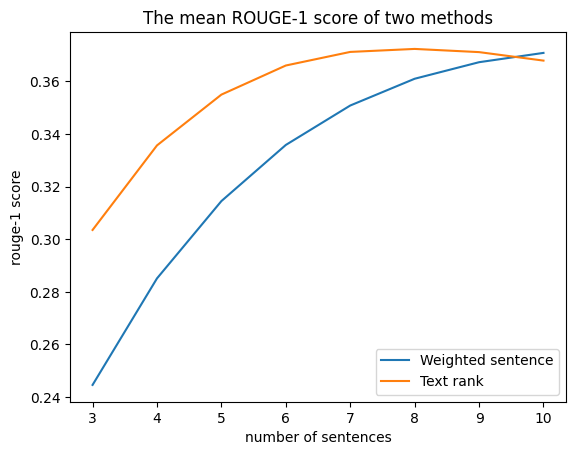

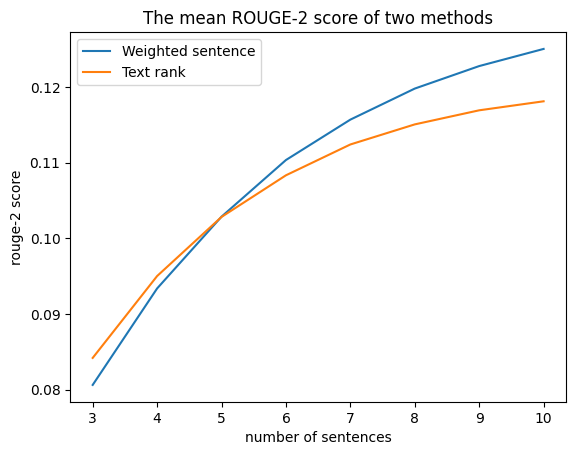

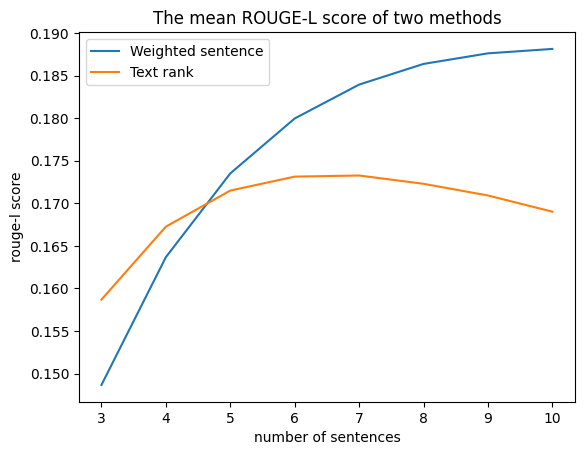

In [ ]:
import matplotlib.pyplot as plt
from rouge import Rouge
rouge = Rouge()


def nltk_eval(processed_df):
  df = processed_df[['body_text', 'abstract']]
  df_size = len(df)
  summ =  NLTK_Extractive_Summarizer(language='english', summary_length=12)
  mean_scores_1 = {'rouge-1': np.zeros(8), 'rouge-2': np.zeros(8), 'rouge-l': np.zeros(8)}
  mean_scores_2 = {'rouge-1': np.zeros(8), 'rouge-2': np.zeros(8), 'rouge-l': np.zeros(8)}

  for idx in tqdm(range(df_size), total=df_size):
    abstract = df.abstract.iloc[idx]
    text = df.body_text.iloc[idx]
    summ1 = summ.summarize(text, method=1)
    summ2 = summ.summarize(text, method=2)
    
    for i, num in enumerate(list(range(3, 11))):
      pred_1 = " ".join(summ1[:num])
      pred_2 = " ".join(summ2[:num])

      # calculate ROUGE scores
      scores_1 = rouge.get_scores(pred_1, abstract)
      scores_2 = rouge.get_scores(pred_2, abstract)
    
      # get the ROUGE-1, ROUGE-2, and ROUGE-L scores
      mean_scores_1['rouge-1'][i] += scores_1[0]['rouge-1']['f']
      mean_scores_2['rouge-1'][i] += scores_2[0]['rouge-1']['f']

      mean_scores_1['rouge-2'][i] += scores_1[0]['rouge-2']['f']
      mean_scores_2['rouge-2'][i] += scores_2[0]['rouge-2']['f']

      mean_scores_1['rouge-l'][i] += scores_1[0]['rouge-l']['f']
      mean_scores_2['rouge-l'][i] += scores_2[0]['rouge-l']['f']


  for i in range(8):
    mean_scores_1['rouge-1'][i] = mean_scores_1['rouge-1'][i] / df_size
    mean_scores_1['rouge-2'][i] = mean_scores_1['rouge-2'][i] / df_size
    mean_scores_1['rouge-l'][i] = mean_scores_1['rouge-l'][i] / df_size

    mean_scores_2['rouge-1'][i] = mean_scores_2['rouge-1'][i] / df_size
    mean_scores_2['rouge-2'][i] = mean_scores_2['rouge-2'][i] / df_size
    mean_scores_2['rouge-l'][i] = mean_scores_2['rouge-l'][i] / df_size
  
  nltk_eval_plot(mean_scores_1, mean_scores_2)
  return


def nltk_eval_plot(mean_scores_1, mean_scores_2):
  x = list(range(3, 11))
  for i,metric in enumerate(['rouge-1', 'rouge-2', 'rouge-l']):
    y1, y2 = mean_scores_1[metric], mean_scores_2[metric]
    # plot line 1
    plt.plot(x, y1, label="Weighted sentence")
    # plot line 2
    plt.plot(x, y2, label="Text rank")
    # add legend and labels
    plt.legend()
    plt.xlabel("number of sentences")
    plt.ylabel(f"{metric} score")
    plt.title(f"The mean {metric.upper()} score of two methods")
    # display the plot
    plt.show()
  return

nltk_eval(processed_df)

In general, the NLTK approaches above are characterized by its ease of deployment, no model training requirements, and grammatical accuracy. However, its performance is deemed suboptimal due to its reliance on frequency and PageRank algorithms, which are unable to fully capture the semantic meaning of the original text. Moreover, summaries produced by extracting sentences tend to lack coverage of the entire document and coherence between sentences.Therefore, we will explore on the state-of-the-art abstractive summarization methods to address these limitations, given their ability to contextualize and better comprehend the original text to generate concise and readable summaries that effectively capture the most significant information.

## Abstractive Summarizers: BERT2BERT Archetecure with pre-trained SciBERT and COVID-SciBERT

To mitigate the limitation of semantic context in the methods above, we next explore the pretrained language model, BERT, for the summarization task. It employs self-attention, so it can encode the interrelationships among various tokens in a sequence. This enables it to grasp intricate dependencies between different sections of the text, resulting in the creation of contextualized hidden embeddings of the input sentence. We utilize the idea of transfer learning, and employ the pre-trained CORD-SciBERT base model (https://huggingface.co/lordtt13/COVID-SciBERT) and SciBERT (https://huggingface.co/allenai/scibert_scivocab_cased) in the BERT2BERT archetecture.
Specifically, COVID-SciBERT is a SciBERT model that further pretrained on the CORD-19 corpus. Therefore, we are able to leverage its rich pretrained knowledge for our target task of CORD-19 summarization.

### Dataset Preparation


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizerFast, AutoTokenizer
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# extract 500 tokens using the NLTK method
def select_sen(text,length = 500):
  num_sen = 1
  while len(text.split()) < length:
    extractor = NLTK_Extractive_Summarizer(summary_length = num_sen)
    text = extractor.summarize(text)
    del extractor
    num_sen += 1
    if num_sen > 300: # some text are originally short
      break
  short = ' '.join(text.split()[:length])
  return short


def short_dataset(processed_df):
  path = assign3_root_path+'/bert_summary_dataset.tsv'
  if not os.path.exists(path):
    # collect all shortened body_text and abstract to dataframe
    bert_dataset_df = pd.DataFrame()
    body_text_lst = processed_df['body_text'].tolist()
    target_summary_lst = processed_df['abstract'].tolist()
    # shorten body text
    short_body_text_lst = []
    for i,body_text in enumerate(body_text_lst):
      short_body_text = select_sen(body_text,length = 500)
      short_body_text_lst.append(short_body_text)
    # shorten abstract
    short_target_summary_lst = []
    for i,target_summary in enumerate(target_summary_lst):
      short_target_summary_lst.append(' '.join(target_summary.split()[:250]))

    bert_dataset_df['body_text'] = short_body_text_lst 
    bert_dataset_df['target_summary'] = short_target_summary_lst 
    dropRows = bert_dataset_df[bert_dataset_df['body_text'].str.split(' ').str.len()<100].index 
    bert_dataset_df =  bert_dataset_df.drop(dropRows, axis = 0)
    bert_dataset_df.to_csv(path, sep="\t")
    return bert_dataset_df
  else:
    bert_dataset_df = pd.read_csv(path, sep="\t",index_col=0)
    return bert_dataset_df


bert_dataset_df = short_dataset(processed_df)
bert_dataset_df

,body_text,target_summary
0,In section provide overview South Africa demog...,This article interrogates curriculum recovery ...
1,The rapid emergence dissemination severe acute...,Understanding SARS-CoV-2 immune pathology crit...
2,Growth development layer pullets rearing early...,Two experiments conducted study effects dietar...
3,The translation sector seen increase volunteer...,This chapter takes socionarrative approach exa...
4,Podoplanin PDPN T1 E11 antigen PA2.26 antigen ...,Podoplanin PDPN cell-surface mucin-like glycop...
...,...,...
11860,Chemicals purchased Sigma-Aldrich unless other...,Image see text High-throughput rapid serology ...
11861,The Republic Korea experienced largest outbrea...,A case-control study performed identify clinic...
11862,On 17 November 2019 SARS-CoV-2 virus first rep...,Introduction The emergence SARS-CoV-2 virus ca...
11863,According Virginia Henderson nurse dynamic pow...,Respect human virtue nature universal feeling ...


traing set input and label distribution:


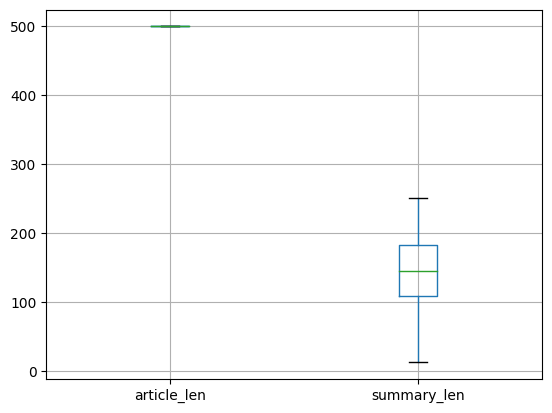

Validation set input and label distribution:


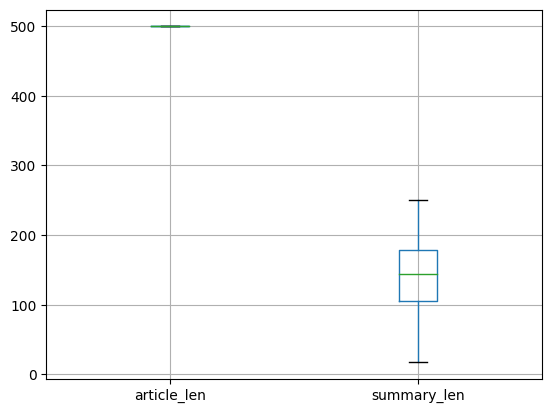

Test set input and label distribution:


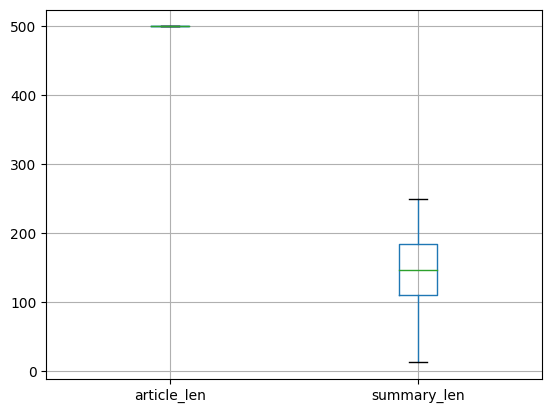

In [ ]:
def data_split(dataset_df):
  # set path to store the splitted text
  train_path = assign3_root_path+'/bert_train_dataset.tsv'
  val_path = assign3_root_path+'/bert_val_dataset.tsv'
  test_path = assign3_root_path+'/bert_test_dataset.tsv'

  # if already have the splitted data, load them directly
  if os.path.exists(train_path) and os.path.exists(val_path) and os.path.exists(test_path) :
    bert_train_df = pd.read_csv(train_path, sep="\t",index_col=0)
    bert_val_df = pd.read_csv(val_path, sep="\t",index_col=0)
    bert_test_df = pd.read_csv(test_path, sep="\t",index_col=0)
  # if splitted datasets do not exist, split the data and form the datasets
  else:
    # split the whole dataset into train, val, test with proportions of 0.7, 0.1, 0.2
    x_train, x_test_val, y_train, y_test_val = train_test_split(dataset_df['body_text'], dataset_df['target_summary'], test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=0.75, random_state=0)
    
    # input: article; ground truth: abstract
    bert_train_df = pd.DataFrame()
    bert_train_df['article'] = x_train
    bert_train_df['summary'] = y_train

    bert_val_df = pd.DataFrame()
    bert_val_df['article'] = x_val
    bert_val_df['summary'] = y_val

    bert_test_df = pd.DataFrame()
    bert_test_df['article'] = x_test
    bert_test_df['summary'] = y_test
    
    # save train, val, test set to tsv files
    bert_train_df.to_csv(train_path, sep="\t")
    bert_val_df.to_csv(val_path, sep="\t")
    bert_test_df.to_csv(test_path, sep="\t")

  return bert_train_df, bert_val_df, bert_test_df


# Show the text length distributions for all 3 datasets
def dataset_statistics(df):
    article_len = df.article.str.split().str.len()
    summary_len = df.summary.str.split().str.len()
    # len_df = pd.DataFrame([article_len,summary_len], columns=['Col1', 'Col2'])
    len_df = pd.DataFrame(dict(s1 = article_len, s2 = summary_len)).reset_index().drop(columns = 'index')
    len_df.columns = ['article_len', 'summary_len']
    boxplot = len_df.boxplot(column=['article_len', 'summary_len'])
    boxplot.plot()
    plt.show()
    return

bert_train_df, bert_val_df, bert_test_df = data_split(bert_dataset_df)
print('traing set input and label distribution:')
dataset_statistics(bert_train_df)
print('Validation set input and label distribution:')
dataset_statistics(bert_val_df)
print('Test set input and label distribution:')
dataset_statistics(bert_test_df)

From the plot above, we can see the inputs and labels in all the datasets have meet the BERT model's requirement, that all the articles are reduced to 500 words < 512. And the summary labels are capped to 250 words. The reason why we use 500, not 512 words is because BERT is utilizing WordPiece tokenizer, that works on subwords, so there is a chance that one word is represented by two tokens after the tokenization. Furthermore, BERT tokenizers will also adding two special tokens [CLS] and [SEP] to indicate the beginning of the text and the end of the text in summarization task. (In other tasks, these two special tokens usually indicate the begnning and the end of the sentence instead of the text.)

In [ ]:
import torch
from transformers import BertTokenizerFast, AutoTokenizer
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# load tokenizer
def load_tokenizer(args):
    if not os.path.exists(args.tokenizer_save_path):
        tokenizer = BertTokenizerFast.from_pretrained(args.model_name)
        tokenizer.save_pretrained(args.tokenizer_save_path)
        return tokenizer
    return BertTokenizerFast.from_pretrained(args.tokenizer_save_path)


class BERT_Dataset(Dataset):
    def __init__(self, data_df, tokenizer, input_max=512, summary_max=128):
        self.df = data_df
        self.article = data_df['article'].tolist() # article - input
        self.summary = data_df['summary'].tolist() # summary - output
        self.xmax = input_max # max_seq_len
        self.ymax = summary_max # output max length
        self.tokenizer = tokenizer
    
    # use tokenizer to get the input_ids tensors and attention mask tensor
    def encode_str(self, s, lim):
        t = self.tokenizer(s, max_length=lim, truncation=True,
                           padding='max_length', return_tensors='pt')
        return t.input_ids[0], t.attention_mask[0]
   
    # get the number of samples
    def __len__(self):
        return self.df.shape[0]
    
    # pack {input_ids, attention_mask, labels, decoder_input_ids, decoder_attention_mask}
    def __getitem__(self, idx):
        x, xmask = self.encode_str(self.article[idx], self.xmax)
        y, ymask = self.encode_str(self.summary[idx], self.ymax)

        # We have to make sure that the PAD token is ignored by the loss function
        labels = [-100 if token == tokenizer.pad_token_id else token for token in y]#y.clone()
        
        labels = torch.tensor([torch.tensor(-100) if token == self.tokenizer.pad_token_id else token for token in y])
        return {
            'input_ids':x.squeeze(0),
            'attention_mask':xmask.squeeze(0),
            'labels': labels.squeeze(0),
            'decoder_input_ids':y.squeeze(0),
            'decoder_attention_mask':ymask.squeeze(0)
             }

# convert dataset to dataloader to iterate by batch
def create_bert_dataloader(args,data_df, tokenizer, batch_size,shuffle = True):
    data_loader = DataLoader(
            BERT_Dataset(data_df, tokenizer, input_max=args.input_max, summary_max=args.summary_max),
            batch_size=batch_size,
            shuffle=shuffle,
            num_workers=2,
        )
    return data_loader

In [ ]:
from transformers import EncoderDecoderModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup, BertGenerationEncoder, BertGenerationDecoder
import tqdm
from rouge import Rouge

class SciBERT_Trainer():
    def __init__(self, args, tokenizer,train_loader=None, val_loader=None, test_loader=None):
        self.args = args
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader= test_loader
        self.tokenizer = tokenizer
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = self.__init_model()
        self.rouge = Rouge()# evaluate the model using rouge

    def __init_model(self):
        # set special tokens
        bos_token_id = self.tokenizer.cls_token_id #[CLS]: 102
        eos_token_id = self.tokenizer.sep_token_id #[SEP]: 103
        pad_token_id =  self.tokenizer.pad_token_id #[PAD]: 0

        model = EncoderDecoderModel.from_encoder_decoder_pretrained(self.args.model_name, self.args.model_name)
        
        # set special token ids to the newly constructed encoder-decoder model
        model.config.decoder.decoder_start_token_id = bos_token_id 
        model.config.decoder_start_token_id = bos_token_id
        model.config.encoder.bos_token_id = bos_token_id 
        model.config.encoder.eos_token_id = eos_token_id
        model.config.encoder.pad_token_id = pad_token_id
        model.config.pad_token_id = pad_token_id

        # set no_repeat_ngram_size
        model.config.no_repeat_ngram_size = self.args.no_repeat_ngram_size
        # set number of beams in beam search during generation
        model.config.num_beams = self.args.num_beams

        # froze SciBERT encoder only, but unfroze the decoder
        for name, param in model.named_parameters():
            if 'encoder.encoder' in name or 'encoder.pooler' in name:
                param.requires_grad = False
            else:
                param.requires_grad = True

        # to device: cpu or gpu
        return model.to(self.device)

    def train(self):
        # total steps
        t_total = len(self.train_loader) * self.args.epochs

        # setting up hyperparameters for the Adam optimizer
        no_decay = ['bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)],
             'weight_decay': self.args.weight_decay},
            {'params': [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
        optimizer = AdamW(optimizer_grouped_parameters, lr=self.args.lr, eps=self.args.adam_epsilon)
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.args.warmup_steps, num_training_steps=t_total)

        # training loop
        global_step = 0
        for e in range(self.args.epochs):
            for step, batch in enumerate(tqdm.tqdm(self.train_loader,desc=f"Training: ep-{e}")):
                global_step += 1
                batch = (v.to(self.device) for k, v in batch.items())
                x, xmask, labels, y, ymask = batch

                outputs = self.model(input_ids=x, attention_mask=xmask,
                                labels=labels, decoder_attention_mask=ymask,
                                return_dict=True)
                loss = outputs.loss
                optimizer.zero_grad()
                # backpropagate the loss
                loss.backward()
                optimizer.step()
                scheduler.step()
                
                # eval the model per steps of 500
                if global_step%self.args.eval_steps == 0 and global_step >= self.args.eval_steps:
                    result = self.eval(self.val_loader)
                elif global_step < self.args.eval_steps:
                    result = {'rouge-1':0, 'rouge-2':0,'rouge-l':0}
                
                # log these to weights and biases
                wandb.log({"train_loss":loss,"Rouge1":result['rouge-1'], 'Rouge2':result['rouge-2'],'RougeL': result['rouge-l']})
            
            
        # save model after training
        self.save_model()
        result = self.eval(self.test_loader)
        wandb.log({"train_loss":loss,"Rouge1":result['rouge-1'], 'Rouge2':result['rouge-2'],'RougeL': result['rouge-l']})
        return

    def eval(self,dataloader):
        rouge1_lst, rouge2_lst, rougeL_lst = [], [], []

        # generate tokens
        for i,batch_data in enumerate(tqdm.tqdm(dataloader, desc="Eval")):
            with torch.no_grad():
                generated_tokens = self.model.generate(
                    batch_data["input_ids"].to(self.device),
                    attention_mask=batch_data["attention_mask"].to(self.device))
            if isinstance(generated_tokens, tuple):
                generated_tokens = generated_tokens[0]

            generated_tokens.cpu().numpy()# to cpu and start using numpy
            label_tokens = batch_data["labels"].cpu().numpy()

            decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
            # ignore the token if token is -100
            label_tokens = np.where(label_tokens != -100, label_tokens, tokenizer.pad_token_id) 
            # convert all the token_ids back to text
            decoded_labels = tokenizer.batch_decode(label_tokens, skip_special_tokens=True) 

            preds = [' '.join(pred.strip()) for pred in decoded_preds]
            labels = [' '.join(label.strip()) for label in decoded_labels]
            
            # compute rouge score
            scores = self.rouge.get_scores(hyps=preds, refs=labels, avg=True)
            result = {key: value['f'] * 100 for key, value in scores.items()}
            # wandb.log({"Rouge1":np.mean(result['rouge-1']), 'Rouge2':np.mean(result['rouge-2']),'RougeL': np.mean(result['rouge-l'])})
            
            # collect mean rouge scores for each batch
            rouge1_lst.append(np.mean(result['rouge-1']))
            rouge2_lst.append(np.mean(result['rouge-2']))
            rougeL_lst.append(np.mean(result['rouge-l']))

        # return the average roughe score
        return {'rouge-1':np.mean(rouge1_lst), 'rouge-2':np.mean(rouge2_lst), 'rouge-l':np.mean(rougeL_lst)}

    def save_model(self):
        # Save model checkpoint (Overwrite)
        if not os.path.exists(self.args.model_dir):
            os.makedirs(self.args.model_dir)
        model_to_save = self.model.module if hasattr(self.model, 'module') else self.model
        model_to_save.save_pretrained(self.args.model_dir)

        # Save training arguments together with the trained model
        torch.save(self.args, os.path.join(self.args.model_dir, 'training_args.bin'))
        return

    def load_model(self,model_dir):
        if model_dir == 'own':
            return self.model

        # Check whether model exists
        if not os.path.exists(model_dir):
            raise Exception("Model doesn't exists")
        try:
            model = self.__init_model()
            if self.device == 'cuda': # gpu
              state_dict = torch.load(model_dir+'/pytorch_model.bin')
            else: # cpu
              state_dict = torch.load(model_dir+'/pytorch_model.bin',map_location=torch.device('cpu'))
            model.load_state_dict(state_dict) # load my weights to the model
            model.to(self.device)
        except:
            raise Exception("Some model files might be missing")
        self.model = model
        return model

In [ ]:
import argparse
import time
from datetime import datetime
import wandb

# parse in a combination of hyperparameters and the type of pretrained model name
parser = argparse.ArgumentParser()
parser.add_argument('--input_max', default = 512, type=str, help='inputs') # Maximum input of BERT is 512
parser.add_argument('--summary_max', default = 128, type=str, help='labels') # The summary output in length of 256 
parser.add_argument('--tokenizer_save_path', type=str, default='./tokenizer') # tokenizer path
parser.add_argument('--model_name', type=str, default="allenai/scibert_scivocab_uncased", help='model name')
# parser.add_argument('--model_name', type=str, default="lordtt13/COVID-SciBERT", help='model name') # Pretrained model that is fine-tuned
parser.add_argument('--epochs', type=int, default=5)  # train the model for 5 epochs
parser.add_argument('--eval_steps', type=int, default=500) # evaluate the model for every 500 steps
parser.add_argument('--weight_decay', type=int, default=0.0) # final weight decay tuned to be 0
parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.") # for Adam optimizer (generally, smaller epsilon gives bigger updates)
parser.add_argument("--warmup_steps", default=0, type=int, help="Linear warmup over warmup_steps.") # warmup step tune to be 0
parser.add_argument("--no_repeat_ngram_size", default=2, type=int, help="no_repeat_ngram_size") # on repeat in bigram 
parser.add_argument("--num_beams", default=5, type=int, help="num_beams in beam search") # during generation, using beam search with beam = 5 (generally better than greedy search)
parser.add_argument("--model_dir", default='SciBERT', type=str, help="model dir.") 
parser.add_argument('--batch_size', type=int, default=4) # <=4 # training batch_size is set to be 4 (this has to be <=4, due to limited computational resources)
parser.add_argument('--eval_batch_size', type=int, default=4) # eval batch size 4
parser.add_argument('--lr', type=float, default=1e-4) # learning rate
parser.add_argument('-f')
args = parser.parse_args()

# the dir for aving models
now = datetime.now()
args.model_dir = args.model_dir + '_' + now.strftime('%m-%d-%H:%M:%S')
args.tokenizer_save_path = args.tokenizer_save_path + '_'+ args.model_name

# get tokenizer
tokenizer = load_tokenizer(args)

# create dataloaders
bert_trainloader = create_bert_dataloader(args,bert_train_df, tokenizer,args.batch_size,shuffle = False)
bert_valloader = create_bert_dataloader(args,bert_val_df ,tokenizer,args.eval_batch_size, shuffle = True)
bert_testloader = create_bert_dataloader(args,bert_test_df,tokenizer,args.eval_batch_size,shuffle = True)


# uncomment these below to train the model:



# create SciBERT trainer object
trainer = SciBERT_Trainer(args, tokenizer, train_loader=bert_trainloader, val_loader=bert_valloader, test_loader=bert_testloader)

## log to weights and biases
# config = {
#   "epochs": args.epochs,
#   "model_name": args.model_name,
#   "lr": args.lr,
# "batch_size": args.batch_size,
# 'adam_epsilon': args.adam_epsilon}
# wandb.login()
# wandb.init(project = 'SciBERT', config=config)

## train the model
#trainer.train() 

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing Ber

### The Training Loss Plot From My Weights and Biases: 
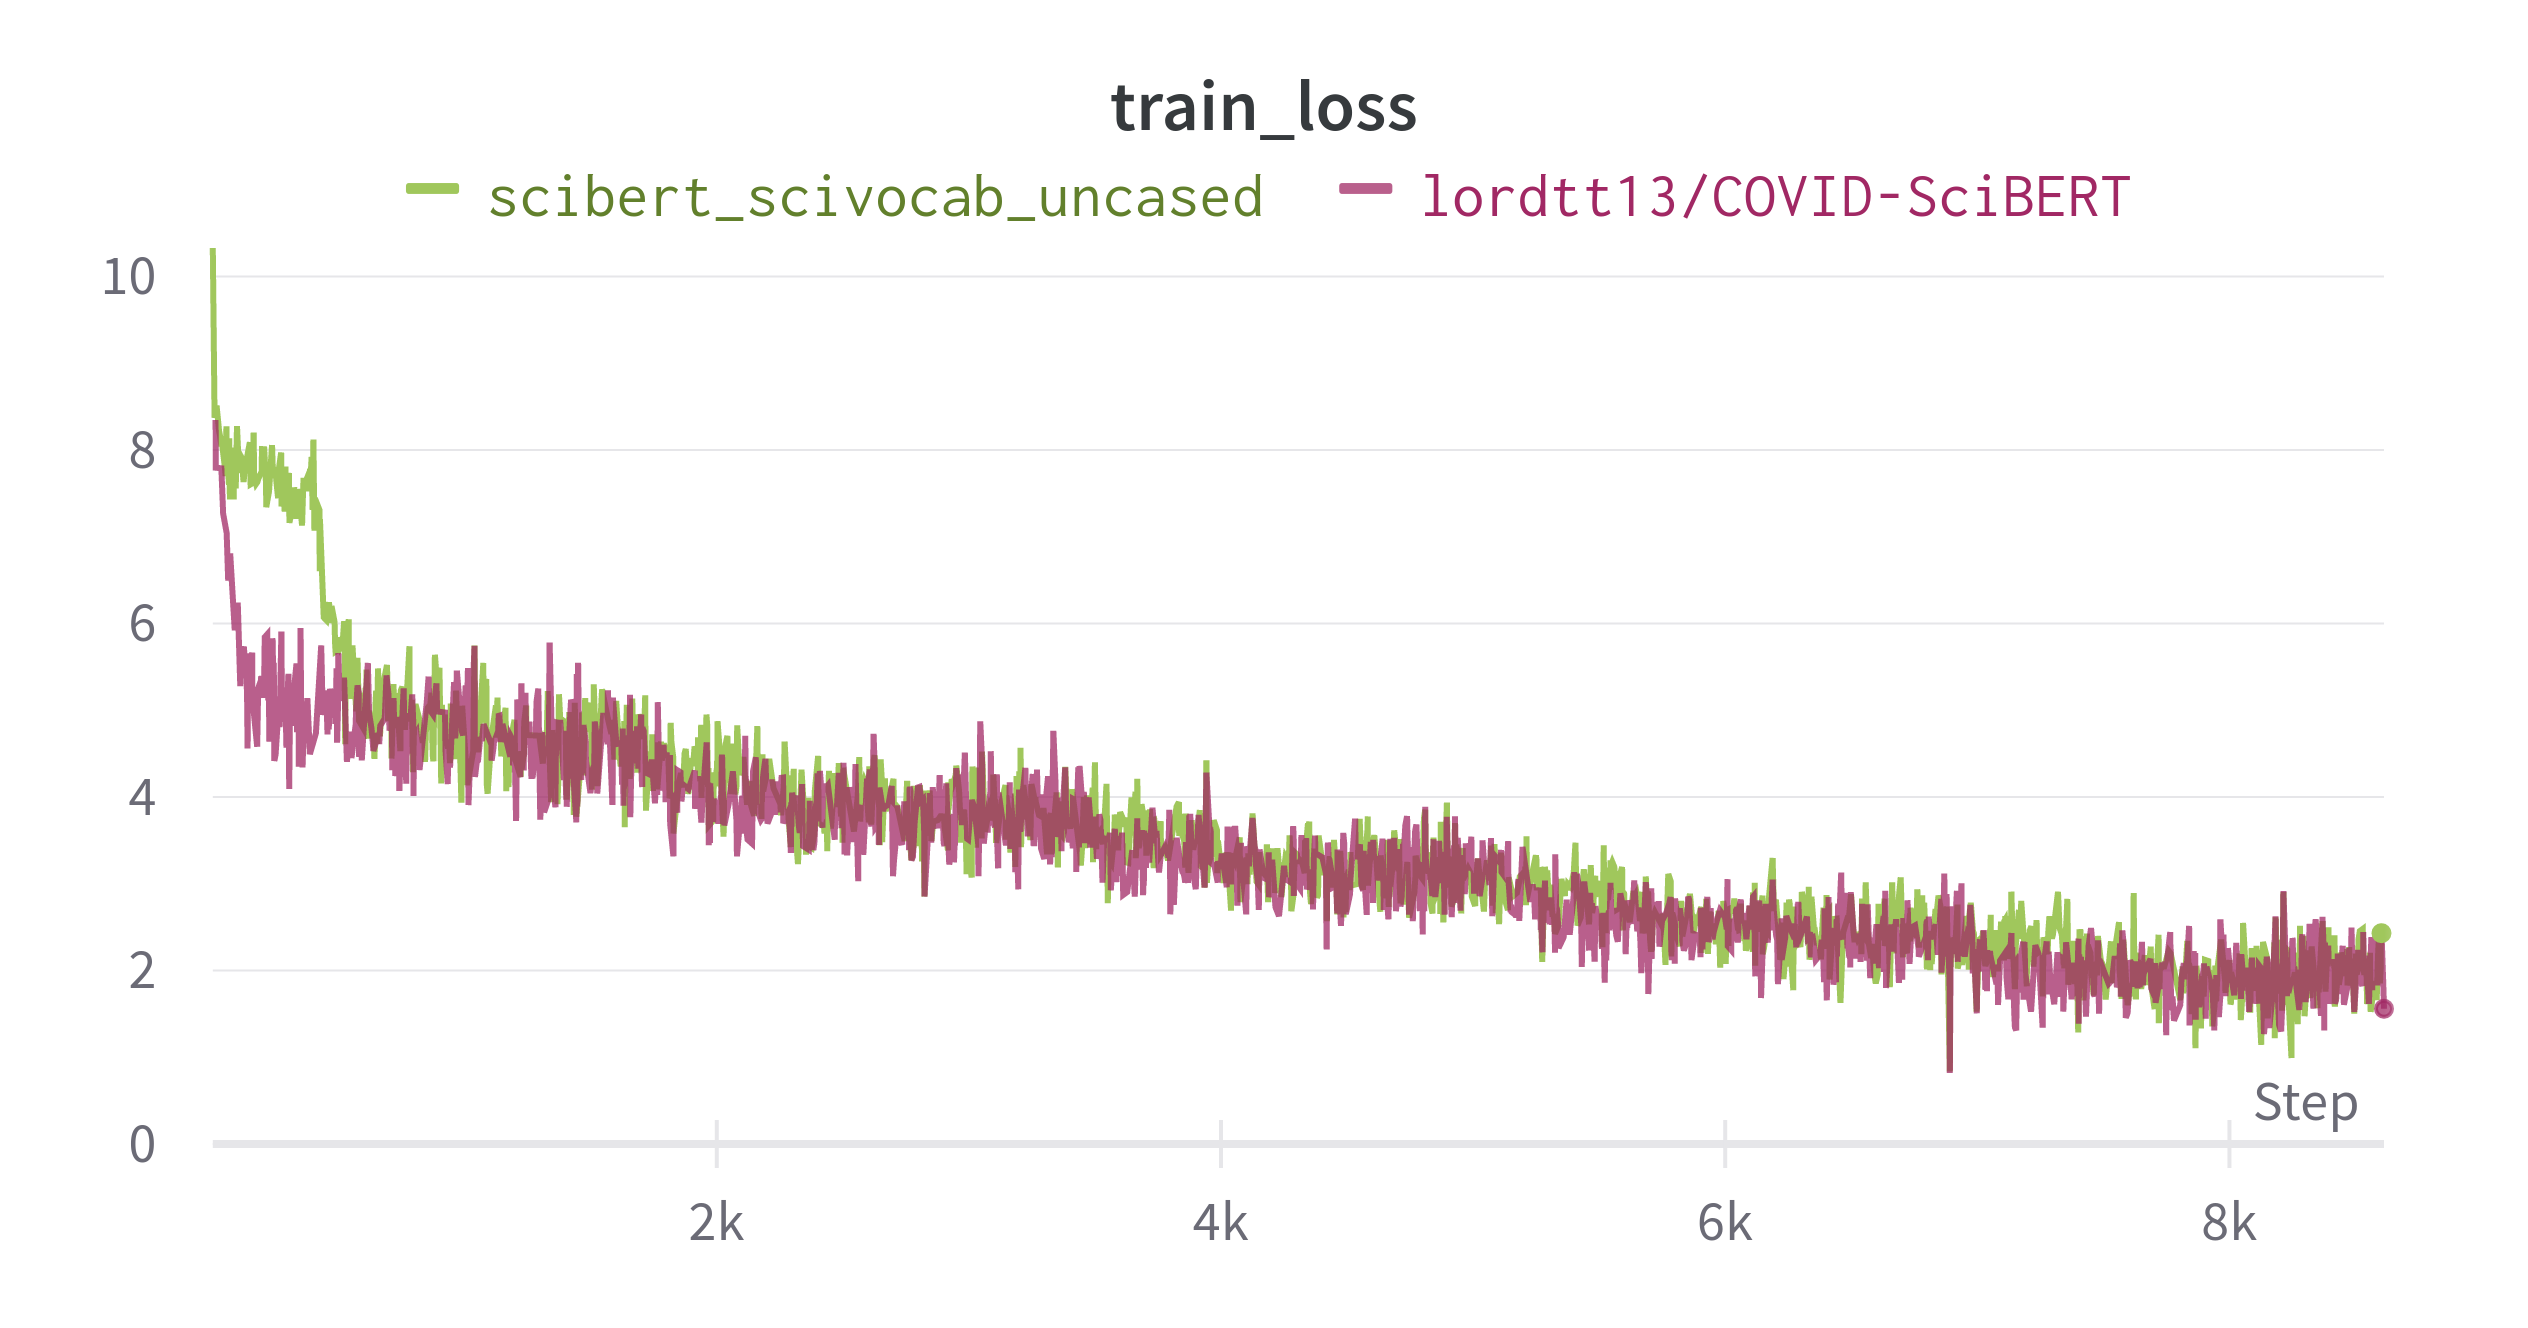

The figure above is the training loss plot from my Weights and Biases, where the yellow, green, and purple curves are corresponding to the BERT2BERT archetecture employed the components of 'bert-base-uncased', 'Sci-BERT', and 'COVID-SciBERT' respectively. It is observed that  the training processes of COVID-SciBERT and SciBERT exhibit similar convergence patterns, ultimately converging at the end of the training epoch. In contrast, 'bert-base-uncased' encountered a bottleneck at early training step and experienced difficulty in adapting to the summary data. One plausible explanation for the observed performance difference is that the 'bert-based-uncased' model may not possess sufficient proficiency in comprehending the scientific biomedical texts, as its pre-training regimen is limited to general texts. In contrast, Sci-BERT and COVID-SciBERT are subjected to an additional pre-training phase using scientific biomedical texts, thereby acquiring more pertinent knowledge. Consequently, in the context of abstractive summarization, which requires content comprehension, models that are pre-trained with relevant domain-specific knowledge exhibit superior performance. The evaluations are shown below: 

### BERT2BERT Evaluations 
(These models are large for my computer, so I couldn't put them in a function or a loop to evaluate them together. Therefore, I have to evaluate them one by one and restart the knernal in between)

In [ ]:
# [1]*10**10 #-> for high RAM in colab
trainer = SciBERT_Trainer(args, tokenizer, train_loader=bert_trainloader, val_loader=bert_valloader, test_loader=bert_testloader)
model_dir = assign3_root_path+'/COVID_SciBERT_04-16-16:54:54__114'
trainer.load_model(model_dir)
trainer.eval(bert_testloader)

Some weights of the model checkpoint at lordtt13/COVID-SciBERT were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at lordtt13/COVID-SciBERT and are newly initialized: ['bert.encoder.layer.4.crossattention.self.key

{'rouge-1': 80.55301444135257,
 'rouge-2': 35.86715207907182,
 'rouge-l': 75.81808479933206}

In [ ]:
args.model_name = "allenai/scibert_scivocab_uncased"
# get tokenizer
tokenizer = load_tokenizer(args)
bert_testloader = create_bert_dataloader(args,bert_test_df,tokenizer,args.eval_batch_size,shuffle = True)

sci_trainer = SciBERT_Trainer(args, tokenizer, train_loader=bert_trainloader, val_loader=bert_valloader, test_loader=bert_testloader)
model_dir = assign3_root_path+ '/SciBERT_04-18-13:07:07_115'
sci_trainer.load_model(model_dir)
sci_trainer.eval(bert_testloader)

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing Ber

{'rouge-1': 80.38133498230397,
 'rouge-2': 36.12690724455392,
 'rouge-l': 75.82386198615691}

### Results
#### ROUGE
Component Model    | ROUGE-1 | ROUGE-2 | ROUGE-L
-------------------|-----------------|--------|---
SciBERT            | 80.38   | 36.13 | 75.82  |
CORD-SciBERT       | 80.55   | 35.87 | 75.82  |


From the results above, the performances of SciBERT and CORD-SciBERT are closely comparable, with SciBERT slightly surpassing CORD-SciBERT in Rouge-2 score and CORD-SciBERT marginally outperforming SciBERT in Rouge-1 score.  A possible explaination is CORD-SciBERT has better knowledge about the COVID terminologies, therefore, could have larger unigram overlaps with the groud truth COVID summary. Furthermore, the observed similarity in the performance of SciBERT and CORD-SciBERT is not aligned with my initial expectation, as it was anticipated that COVID-SciBERT, with its increased pre-trained knowledge more related to the task at hand, would outperform SciBERT. However, the results demonstrate that there exist no significant differences between the two models.


However, in order to arrive at a more definitive conclusion, it is necessary to conduct more comprehensive experiments, such as hyper-parameter tuning for all models and gathering additional high-quality summarization data. Due to current limitations in computational resources, these initiatives will be considered as potential future work.

#### Human Evaluation

In [ ]:
# SciBERT_Summarizer is a summarizer used during inference
class SciBERT_Summarizer:
    def __init__(self,args,model):
        self.tokenizer = load_tokenizer(args)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = model.to(self.device)
        self.MAX_LENGTH = args.input_max

    def summarize(self,article):
        # tokenize input and get the required inputs: 1.token_ids and 2. attention mask
        t = self.tokenizer(article, max_length=self.MAX_LENGTH, truncation=True,padding='max_length', return_tensors='pt')
        input_ids = t.input_ids[0].unsqueeze(0)
        attention_mask = t.attention_mask[0].unsqueeze(0)
        inputs = {'input_ids':input_ids.to(self.device),'attention_mask':attention_mask.to(self.device)}
        #generate token ids
        with torch.no_grad():
            generated_tokens = self.model.generate(**inputs)
            if isinstance(generated_tokens, tuple):
                generated_tokens = generated_tokens[0]
        # decode token ids bto text
        summary = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
        return summary

In [ ]:
model_dir = assign3_root_path+'/COVID_SciBERT_04-16-16:54:54__114'
model = trainer.load_model(model_dir)
article = bert_test_df['article'].tolist()[5]
abstract = bert_test_df['summary'].tolist()[5]
sci_summarizer = SciBERT_Summarizer(args,model)
print(f'\nAbstract: {abstract} \n')
print(f'\nBody_text: {article} \n')
summary = sci_summarizer.summarize(article)
print(f'Summary Output: {summary} \n')

Some weights of the model checkpoint at lordtt13/COVID-SciBERT were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at lordtt13/COVID-SciBERT and are newly initialized: ['bert.encoder.layer.2.crossattention.output.d


Abstract: Suicide outcome interaction biological personal social risk factors. The purpose study verify effects strain due individual risk factors social risk factors suicidality mediating effect depressive symptoms relationship strain related individual risk factors social risk factors suicidality. The data sociopsychological anxiety survey Korea society conducted Korea Institute Health Social Affairs 2015 used verifying model. We analyzed data 7000 adults aged 19 79 years using Structural Equation Modeling. Strain due individual risk factors positively related depressive symptoms suicidality. Interestingly strain induced social risk factors positively associated depressive symptoms suicidality. Social support significantly associated depressive symptoms suicidality. Depressive symptoms directly affected suicidality. In addition strain due individual risk factors social risk factors indirectly affected suicidality mediating depressive symptoms. These findings suggest individual effor

In [ ]:
model_dir = assign3_root_path+'/SciBERT_04-18-13:07:07_115'
args.model_name = 'allenai/scibert_scivocab_uncased'
sci_trainer = SciBERT_Trainer(args, tokenizer, train_loader=bert_trainloader, val_loader=bert_valloader, test_loader=bert_testloader)
sci_model = sci_trainer.load_model(model_dir)
article = bert_test_df['article'].tolist()[5]
abstract = bert_test_df['summary'].tolist()[5]
sci_summarizer = SciBERT_Summarizer(args,sci_model)
print(f'\nAbstract: {abstract} \n')
print(f'\nBody_text: {article} \n')
summary = sci_summarizer.summarize(article)
print(f'Summary Output: {summary} \n')

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing Ber


Abstract: Suicide outcome interaction biological personal social risk factors. The purpose study verify effects strain due individual risk factors social risk factors suicidality mediating effect depressive symptoms relationship strain related individual risk factors social risk factors suicidality. The data sociopsychological anxiety survey Korea society conducted Korea Institute Health Social Affairs 2015 used verifying model. We analyzed data 7000 adults aged 19 79 years using Structural Equation Modeling. Strain due individual risk factors positively related depressive symptoms suicidality. Interestingly strain induced social risk factors positively associated depressive symptoms suicidality. Social support significantly associated depressive symptoms suicidality. Depressive symptoms directly affected suicidality. In addition strain due individual risk factors social risk factors indirectly affected suicidality mediating depressive symptoms. These findings suggest individual effor

We can see the summaries above correctly convey the main idea of this article, due to the component models contain pretrained knowledge. However, the fluency and the grammar of this summary is suboptimal, especially, CORD-SciBERT genrated incomplete sentences "the present study aimed investigate". From human evaluation, Sci-BERT is better than the CORD-SciBERT. The reason of this BERT2BERT method is because the BERT2BERT archetecture is a combination of two seperate BERT models, where only the individual BERT modles are further pre-trained on scientifit text on the dummy task of Mask Language Modelling (MLM) and Next Sentence Prediction (NSP). This means the whole encoder-decoder model only contains pretrained knowledge about the related topics, but has never been trained on text generation tasks, thus, lacks of good ability of text generawtion and delivers unsatisfactory fluency and grammar.

One potiential future work solution is utilizing more sophisticated and larger models that are at least pre-trained on text generation tasks. Some common models like this are large seq2seq language models, such as GPT.

Therefore, based on human evaluation, we are using SciBERT type as the abstractive summarizer in our final pipeline.

# User Prompt

In [ ]:
# IR_summary will summarize the top 5 articles according to the method user required
def IR_summary(query,IR,processed_df,sci_summarizer, method = 3):
  # get the paper rank
  paper_rank = IR.retrive(query,show = False)
  # get top 5 papers
  id_rank = [paper_tup[0] for paper_tup in paper_rank][:5]
  # collect all 5 body text
  all_body_text = ''
  for id in id_rank:
    body_text = processed_df.loc[processed_df['paper_id']==id]['body_text'].values[0]
    all_body_text += ' '+body_text
  all_body_text = all_body_text.strip()
  
  # NLTK
  if method == 1:
    NUM_SEN = int(input("How many sentences: \n")) # number of sentences in the summary
    extractor = NLTK_Extractive_Summarizer(summary_length = NUM_SEN)
    summary = extractor.summarize(all_body_text)
  else:
    # get all 5 abstracts as the input for method 2 
    all_abstract = ''
    for id in id_rank:
      abstract = processed_df.loc[processed_df['paper_id']==id]['abstract'].values[0]
      all_abstract += ' '+abstract
    all_abstract = all_abstract.strip()
    nlp = spacy.load("en_core_sci_sm")

    # get the first 500 tokens due to the input length limit of method 2
    extracted_text = ' '.join(all_abstract.split()[:500])
    # BERT2BERT
    if method == 2:
      summary = sci_summarizer.summarize(extracted_text)
  return summary

# using BERT2BERT summarizer with SciBERT components
model_dir = assign3_root_path+'/SciBERT_04-18-13:07:07_115'
args.model_name = 'allenai/scibert_scivocab_uncased'
sci_trainer = SciBERT_Trainer(args, tokenizer, train_loader=bert_trainloader, val_loader=bert_valloader, test_loader=bert_testloader)
sci_model = sci_trainer.load_model(model_dir)
sci_summarizer = SciBERT_Summarizer(args,sci_model)

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing Ber

In [ ]:
CONTINUE = True
IR = Retriever(inverted_index,glove_dict,KB,processed_df)

session = 0
while CONTINUE == True:  
    session += 1
    print(f'Session {session}:')
    method = int(input("Please enter the summary method number (1 -- NLTK, 2 -- BERT2BERT): "))
    query = input("Please enter your query: \n")
    paper_rank = IR.retrive(query, show = False)
    if paper_rank != None:
      IR = Retriever(inverted_index,glove_dict,KB,processed_df)
      summary = IR_summary(query,IR,processed_df,sci_summarizer,
                           method) #default summarizer: T5; NLTK default sentence = 3
      print('Summary: \n')
      print(summary)
      print('************************************************************************************************************************************************')
    c = input("Continue search? [y/n]: \n")
    if c == 'n':
        CONTINUE = False


Session 1:
Please enter the summary method number (1 -- NLTK, 2 -- BERT2BERT): 1
Please enter your query: 
What is the relation between mRNA and COVID?
How many sentences: 
2
Summary: 

Host RNA degradation also reported IAV-infected cells though sensitivity host mRNAs IAV-induced host shutoff varies. Intriguingly prokaryotic viruses bacteriophages also trigger rapid host mRNA degradation.
************************************************************************************************************************************************
Continue search? [y/n]: 
y
Session 2:
Please enter the summary method number (1 -- NLTK, 2 -- BERT2BERT): 2
Please enter your query: 
What is the relation between mRNA and COVID?
Summary: 

the direct rna - dependent rna polymerase rdrp plays important role viral infection. it also plays
************************************************************************************************************************************************
Continue search? [y/n]: 
y
S

### For a clearer output comparison, we disabled the intermediate retrieval results in our final Retrieval+summarization System above, and display the old retrieval system in Assignment 2 (without summarization) separatly in the code below:

In [ ]:
CONTINUE = True
IR = Retriever(inverted_index,glove_dict,KB,processed_df)

session = 0
while CONTINUE == True:  
    session += 1
    print(f'Session {session}:')
    query = input("Please enter your query: \n")
    IR.retrive(query, show = True)
    c = input("Continue search? [y/n]: \n")
    if c == 'n':
        CONTINUE = False

Session 1:
Please enter your query: 
What is the relation between mRNA and COVID?
------------------------------ Match Ranked 1 (similarity score: 0.9048044074804591)------------------------------
article identifier: PMC7104030,  article number: 6172 

title:  Virus infection-induced host mRNA degradation and potential application of live cell imaging 

Authors: 
Qi, Dan; Guan, Jitian; Wu, Erxi 

snippet: 

Viruses exist wherever there is life. They can cause allergy, immune response, inflammation, and even fatal diseases directly or indirectly. Accumulating evidence shows that host RNA undergoes rapid degradation during virus infection. Herein, we focus on several possible mechanisms of infection-induced host RNA turnover, which seems to be a common strategy for both prokaryotic and eukaryotic viruses during the very early stage of infection and a potential application of live cell imaging on its visualization.


------------------------------ Match Ranked 2 (similarity score: 0.89524

The prompt examples above show the result of retrieval+summary, where session 1,3,5 are utilising NLTK weighted sentence approach to perform extractive summarization, and session 2,4,6 are using BERT2BERT methods to deliver abstractive summarization.
<br>
It is observed that NLTK weighted sentence method could capture the keywords (Session 1: "mRNA"; Session3: "lung function"; Session 5: "mental health")  in the query, but lacks of coherence between the sentences. It is also observed that BERT2BERT method could capture the concept of the query, usually not the extact keyword in the query (Session2: "mRNA" -> "RNA"; Session4: "lung function" -> "respiratory", Session6: "depression"->"anxiety symptoms"), but the fluency are suboptimal, such as, sentences tends to stop suddently, and grammar mistakes. As discussed above, the potiential future works that enhancing the efficacy of abstractive techniques include the acquisition of vast quantities of high-quality summarization task data, alongside the substitution of current models with larger pre-trained seq2seq models.
<br>
Additionally, the performance of the system is highly replying on the upstream document retrieval (with a MRR of 0.34) due to the nature of the pipelined method.
<br>
In comparison to the retrieval results presented in Assignment 2, it is notable that readers can now rapidly and succinctly access the information they require without having to read through the entire articles. Nevertheless, the generated summaries do exhibit some areas for potential improvement as discussed above.



# References: 

1. Text Rank: https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/?
2. Weighted Sentence: https://towardsdatascience.com/summarize-a-text-with-python-continued-bbbbb5d37adb

3. BERT2BERT: https://arxiv.org/pdf/2110.07143.pdf
4. BERT2BERT: https://colab.research.google.com/github/patrickvonplaten/notebooks/blob/master/BERT2BERT_for_CNN_Dailymail.ipynb#scrollTo=68IHmFYLx09W
5.COVID Sci-BERT: Pre-trined COVID Sci-BERT model: https://huggingface.co/lordtt13/COVID-SciBERT
6. SciBERT: Pre-trined Sci-BERT model: https://huggingface.co/allenai/scibert_scivocab_cased